## Observations and Insights 

In [23]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left")

#Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
mice_count
print(f'There are {mice_count} mice in the study')



There are 249 mice in the study


In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows_df = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows_df





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
#Optional: Get all the data for the duplicate mouse ID. 



In [27]:
#Create clean DataFrame by dropping the duplicate mouse by its ID.

#clean_df = combined_data.drop_duplicates(subset=None,keep=False, inplace=False, ignore_index=False)
clean_df = combined_data.loc[combined_data['Mouse ID']!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
#Checking the number of mice in the clean DataFrame.
new_mice_count = len(clean_df["Mouse ID"].unique())
new_mice_count


248

## Summary Statistics

In [29]:
#Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



#SUMMARY STATS
summary_table = clean_df.groupby("Drug Regimen")

#tumor mean
tumor_mean = summary_table["Tumor Volume (mm3)"].mean()
#tumor variance
tumor_variance = summary_table["Tumor Volume (mm3)"].var()
#tumor standard deviation
tumor_sd = summary_table["Tumor Volume (mm3)"].std()
#tumor median
tumor_median = summary_table["Tumor Volume (mm3)"].median()
#tumor SEM
tumor_sem = summary_table["Tumor Volume (mm3)"].sem(ddof=0)

#summary DataFrame
summary_df = {"Mean": tumor_mean,
                            "Median": tumor_median,
                            "Variance": tumor_variance,
                            "Standard Deviation": tumor_sd,
                            "Standard Error of Mean": tumor_sem,
}
summary_df = pd.DataFrame(summary_df)
summary_df











,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_agg = combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

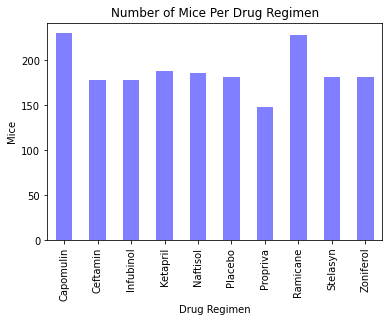

In [32]:
#Bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_timepoint = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

mice_timepoint.plot(kind = "bar", title = "Number of Mice Per Drug Regimen", color='blue', alpha=.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.show()

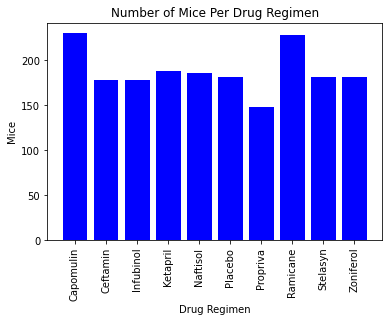

In [33]:
#Bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

x_axis = np.arange(len(mice_timepoint))
y_axis = mice_timepoint
plt.bar(x_axis, y_axis, color = "blue", align = "center")
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xticks(tick_locations, drug_regimens, rotation = "vertical")
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.show()

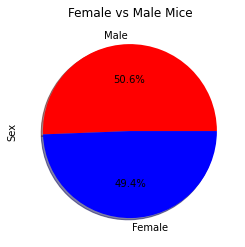

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = combined_data["Sex"].value_counts()

colors = ["red", "blue"]
explode = (0.1, 0)
gender_pie_plot = gender_df.plot(kind = "pie", colors = colors, title = "Female vs Male Mice", autopct = "%1.1f%%", shadow = True)
plt.show()




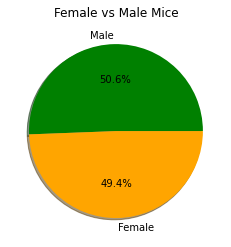

In [38]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_df, labels = combined_data["Sex"].unique(), colors = ["green", "orange"], autopct = "%1.1f%%", shadow = True)
plt.title("Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin





# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
